In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from src.processing import feature_extraction as fe

from pathlib import Path
import numpy as np
import pandas as pd
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

import warnings
warnings.filterwarnings("ignore")

ROOT_PATH = Path(os.getcwd()).parents[1]

In [3]:
#DATASET PATH
dataset_train_path = ROOT_PATH / 'data' / 'raw' / 'L3DAS_Task2_train'     #set here the path
train_data_path = dataset_train_path / 'data'
train_labels_path = dataset_train_path / 'labels'

In [4]:
# SPLIT THE DATASET ACCORDING THE TYPE

list_ = list(os.walk(train_data_path))[0][2]

Mic_1 = [sample for sample in list_ if sample[-5]=='A']
Mic_2 = [sample for sample in list_ if sample[-5]=='B']
Sim_Sounds_1 = [sample for sample in list_ if sample[9]=='1']
Sim_Sounds_2 = [sample for sample in list_ if sample[9]=='2']
Sim_Sounds_3 = [sample for sample in list_ if sample[9]=='3']


In [5]:
#UTILITY FUNCTIONS

def intersection(lst1, lst2):
    "Return lists' elements intersection"
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

def right_labels(Mic,Sim_Sound,path):
    """
    Get the labels fulfilling all the desired conditions
    """
    
    Mic_sound = intersection(Mic,Sim_Sound)
    Mic_sound = [sample for sample in Mic_sound]
    labels = list(os.walk(train_labels_path))[0][2]
    if Mic == Mic_1:
        label_files = [label for label in labels if label[6:-4]+'_A.wav' in Mic_sound]
    elif Mic == Mic_2:
        label_files = [label for label in labels if label[6:-4]+'_B.wav' in Mic_sound]

    return label_files

def tokenize(classes_vector, pandas_Serie):
    """
    Add a token to the vector depending on the class contained in the Serie.
    Used to count classes' incidence over file
    """
    
    if pandas_Serie.Class == 'Chink_and_clink':
        classes_vector[0] += 1
    elif pandas_Serie.Class == 'Computer_keyboard':
        classes_vector[1] += 1
    elif pandas_Serie.Class == 'Cupboard_open_or_close':
        classes_vector[2] += 1
    elif pandas_Serie.Class == 'Drawer_open_or_close':
        classes_vector[3] += 1
    elif pandas_Serie.Class == 'Female_speech_and_woman_speaking':
        classes_vector[4] += 1
    elif pandas_Serie.Class == 'Finger_snapping':
        classes_vector[5] += 1
    elif pandas_Serie.Class == 'Keys_jangling':
        classes_vector[6] += 1
    elif pandas_Serie.Class == 'Knock':
        classes_vector[7] += 1
    elif pandas_Serie.Class == 'Laughter':
        classes_vector[8] += 1
    elif pandas_Serie.Class == 'Male_speech_and_man_speaking':
        classes_vector[9] += 1
    elif pandas_Serie.Class == 'Printer':
        classes_vector[10] += 1
    elif pandas_Serie.Class == 'Scissors':
        classes_vector[11] += 1
    elif pandas_Serie.Class == 'Telephone':
        classes_vector[12] += 1
    elif pandas_Serie.Class == 'Writing':
        classes_vector[13] += 1
        
    return classes_vector



In [6]:
#CHECK IF THE FUNCTIONS ARE WORKING
#GET LIST ONLY WITH RIGHT SAMPLES
#Check if the functions are working
#Get list only with right samples

intersec_input = (Mic_1,Sim_Sounds_3)
Mic1_Sound1 = intersection(intersec_input[0],intersec_input[1])
label_files = right_labels(Mic=Mic_1, Sim_Sound=Sim_Sounds_1, path=train_labels_path)
#print(label_files)
# Mic1_Sound1

In [7]:
#Show features related to one file (CREATE FUNCTION)

samples_names = Mic1_Sound1
number_of_samps = len(samples_names)

audio sample and label doesnt arent related to the same sample

In [8]:
#SET HERE FILES INDEX
index = 10
label = label_files[index]

#Load file as dataframe
df = pd.read_csv(train_labels_path / label)
sample_audio, Sr = librosa.load(train_data_path / samples_names[index],sr=32000,mono=False)
n_fft = 2048
hop_length = int(n_fft/4)
n_mel_bands=100
frame_len = 2049 #POR QUE? OUTRO VALOR NÃO TÁ ROLANDO

In [9]:
audio_stft, freq_bins = fe.get_stft(sample_audio,Sr,n_fft,hop_length)
audio_stft.shape

(4, 1025, 3751)

In [10]:
mel_stft = fe.get_mel_spectrogram(sample_audio,Sr,n_fft,hop_length, n_mel_bands)
mel_stft.shape

(4, 100, 3751)

In [11]:
logmel_stft = fe.get_logmel_spectrogram(sample_audio,Sr,n_fft, hop_length,n_mel_bands)
logmel_stft.shape

(4, 100, 3751)

In [15]:
logmel_stft.dtype

dtype('float32')

In [16]:
int_vector = fe.get_intensity_vector(audio_stft,2049,Sr,n_mel_bands)
int_vector.shape

(3, 100, 3751)

In [14]:
int_vector.dtype

dtype('float64')

In [13]:
ch = 1

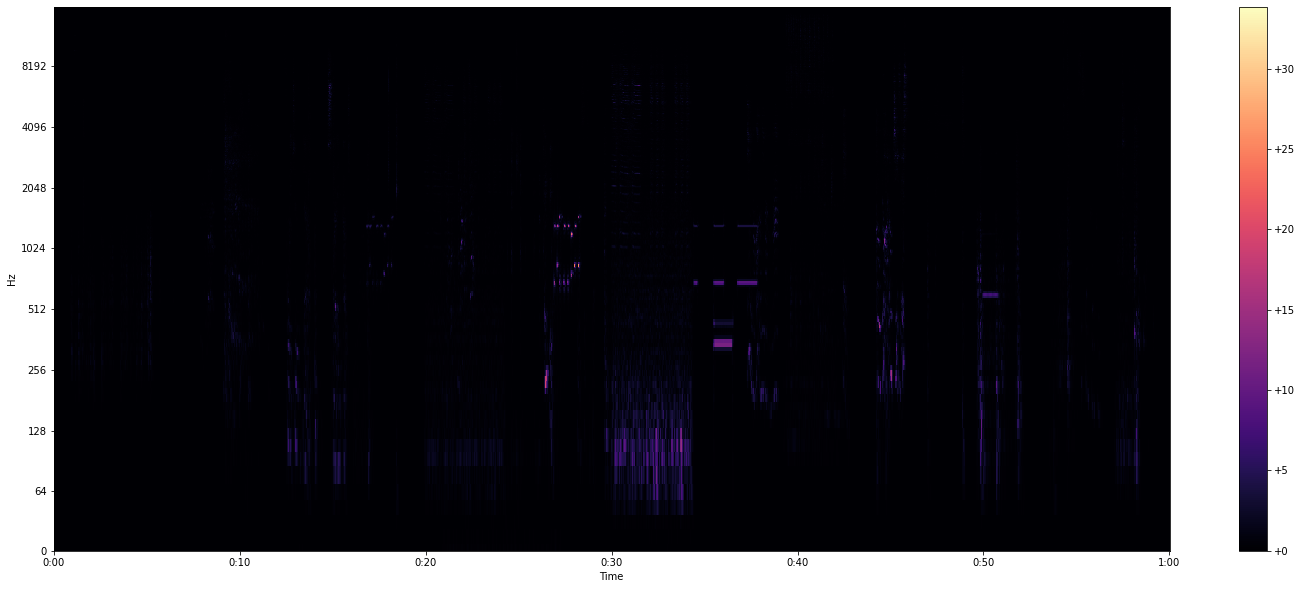

In [14]:
fe.plot_spectrogram(np.abs(audio_stft),ch,Sr,hop_length)

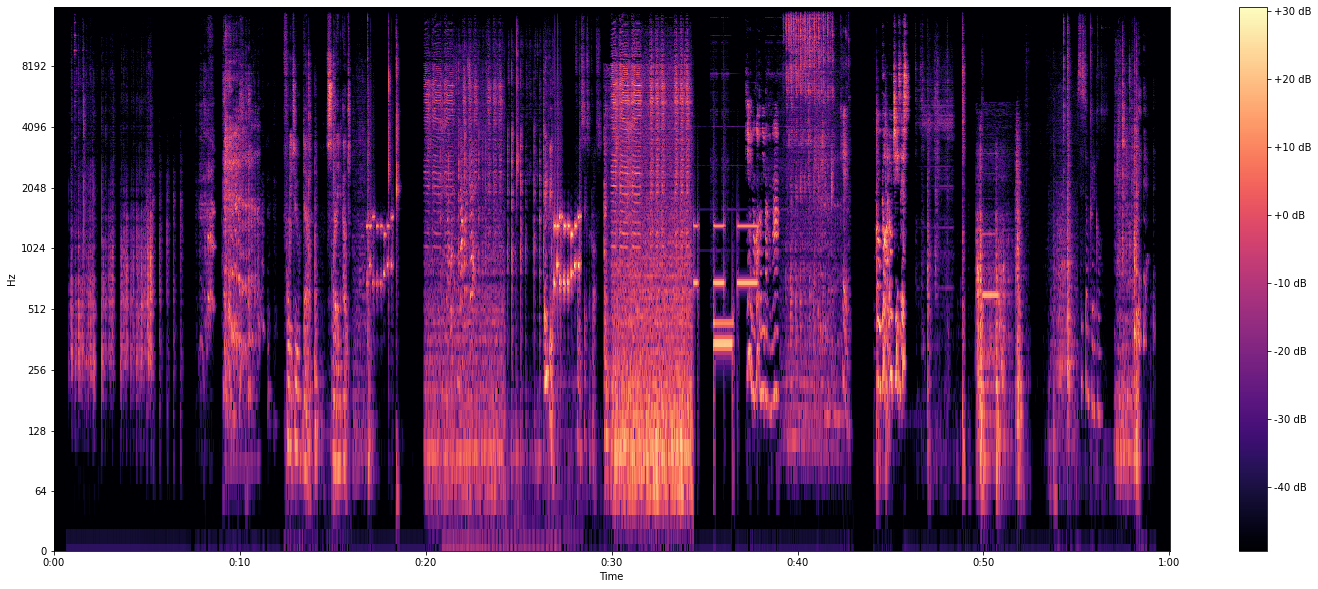

In [15]:
fe.plot_spectrogram_db(audio_stft, ch, Sr, hop_length)

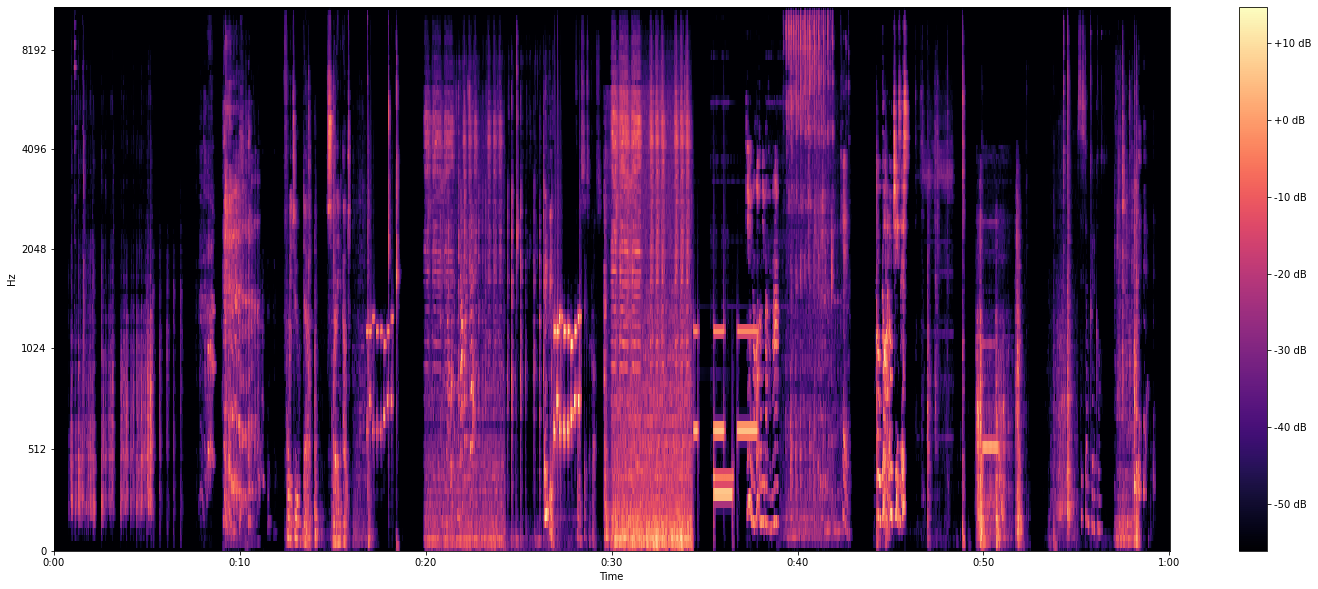

In [16]:
fe.plot_logmel_spectrogram(logmel_stft, ch, Sr, hop_length)

In [17]:
features = np.concatenate((int_vector,logmel_stft), axis=0)

In [18]:
features.shape

(7, 100, 3751)

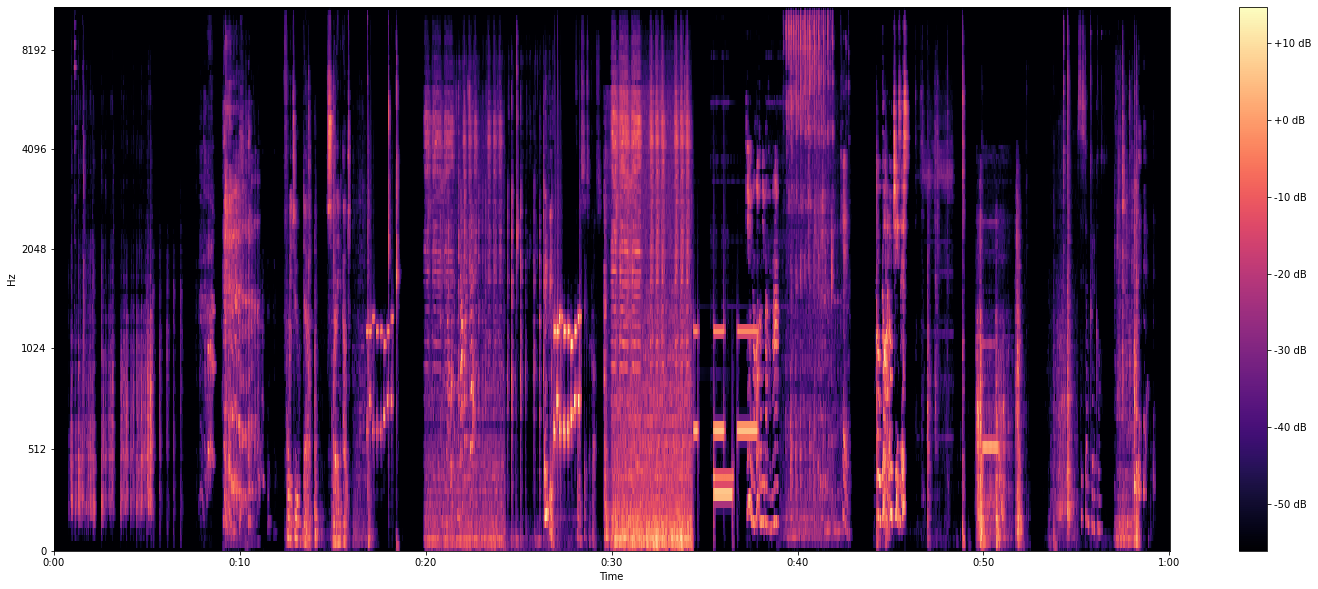

In [19]:
fe.plot_logmel_spectrogram(features, 4, Sr, hop_length)

In [20]:
features.shape

(7, 100, 3751)

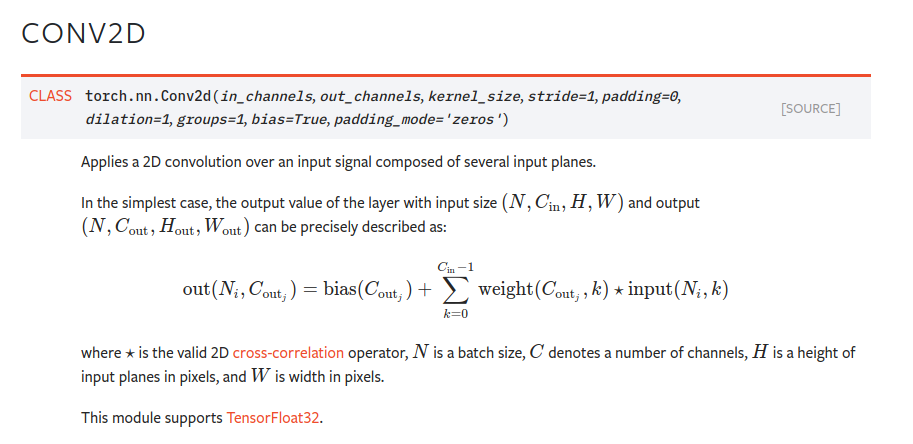

In [28]:
feat = fe.get_logmel_IV(audio=sample_audio)

In [24]:
feat.shape

(7, 100, 3751)

In [32]:
data_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'logmel_IV_10' / 'task2_predictors_train.pkl'

In [38]:
import pickle

with open(data_path, 'rb') as f:
    data = pickle.load(f)

In [41]:
data[0].shape

(7, 100, 3751)

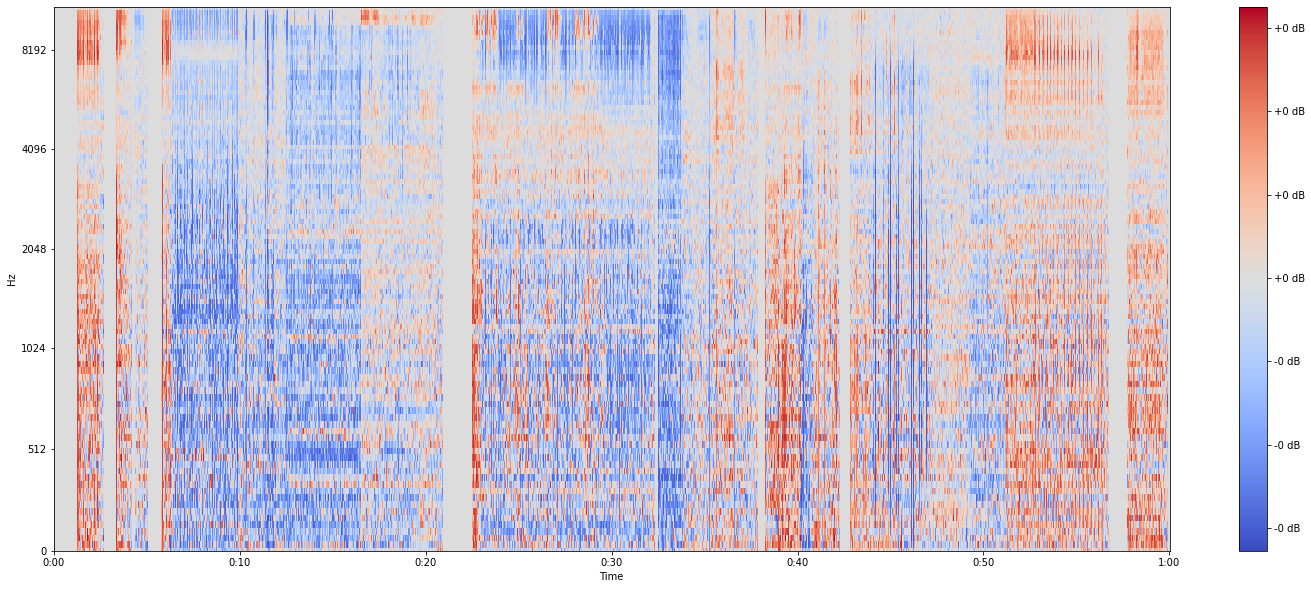

In [48]:
fe.plot_logmel_spectrogram(data[7], 2, Sr, hop_length)